# Linear Regression
* many implementations of OLS in various Python libraries: NumPy, SciPy, statsmodels, scikit-learn
* 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
housing = pd.read_csv('data/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


In [21]:
y = housing['price'] / 1000
x = housing['area']
x = sm.add_constant(x)

In [23]:
x

,const,area
0,1.0,7420
1,1.0,8960
2,1.0,9960
3,1.0,7500
4,1.0,7420
...,...,...
540,1.0,3000
541,1.0,2400
542,1.0,3620
543,1.0,2910


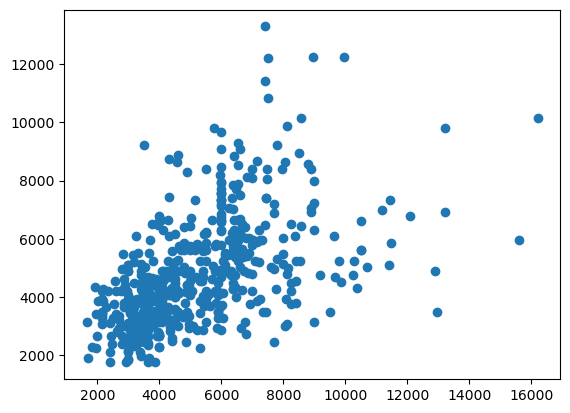

In [9]:
plt.scatter(x['area'], y)

In [11]:
model = sm.OLS(y, x).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           7.39e-42
Time:                        12:58:13   Log-Likelihood:                -4786.5
No. Observations:                 545   AIC:                             9577.
Df Residuals:                     543   BIC:                             9586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2387.3085    174.498     13.681      0.000    2044.535    2730.082
area           0.4620      0.031     14.795      0.000       0.401       0.523
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model.params

const    2387.308482
area        0.461975
dtype: float64

In [17]:
housing.corr()

,price,area,bedrooms,bathrooms,stories
price,1.000000,0.535997,0.366494,0.517545,0.420712
area,0.535997,1.000000,0.151858,0.193820,0.083996
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165
stories,0.420712,0.083996,0.408564,0.326165,1.000000


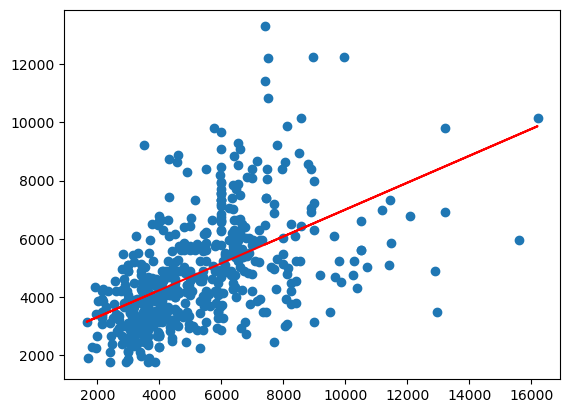

In [25]:
plt.scatter(x['area'], y)
plt.plot(x['area'], model.predict(x), 'r')

In [27]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories']]
x = sm.add_constant(x)

In [29]:
multi_model = sm.OLS(y, x).fit()

In [31]:
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           1.68e-88
Time:                        13:12:19   Log-Likelihood:                -4669.8
No. Observations:                 545   AIC:                             9350.
Df Residuals:                     540   BIC:                             9371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -282.0913    252.387     -1.118      0.264    -777.873     213.690
area           0.3800      0.026     14.693      0.000       0.329       0.431
bedrooms     198.2955     85.096      2.330      0.020      31.137     365.454
bathrooms   1200.1805    121.587      9.871      0.000     961.340    1439.021
stories      531.5950     70.779      7.511      0.000     392.560     670.630
==============================================================================
Omnibus:                       94.932   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.104
Skew:                           0.895   Prob(JB):                     3.97e-51
Kurtosis:                       5.649   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
multi_model.params

const        -282.091290
area            0.380024
bedrooms      198.295494
bathrooms    1200.180473
stories       531.595009
dtype: float64

In [37]:
multi_model.predict()[:10]

array([ 7326.01792512, 10843.21150193,  7561.38947226,  6824.82487029,
        5594.24244267,  7295.11484034,  9498.62174553, 11529.51337231,
        5852.65905458,  7024.67664335])

In [41]:
((y - multi_model.predict(x)) ** 2).mean() ** .5

1273.4821034263662

### sklearn

In [43]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
reg = linear_model.LinearRegression()

In [47]:
reg.fit(x,y)

LinearRegression()

In [49]:
reg.coef_

array([0.00000000e+00, 3.80024429e-01, 1.98295494e+02, 1.20018047e+03,
       5.31595009e+02])

In [53]:
reg.intercept_


-282.0912903634453

In [59]:
reg.predict(x)[:10]

array([ 7326.01792512, 10843.21150193,  7561.38947226,  6824.82487029,
        5594.24244267,  7295.11484034,  9498.62174553, 11529.51337231,
        5852.65905458,  7024.67664335])

In [63]:
mean_squared_error(y, reg.predict(x)) ** .5

1273.4821034263664

In [65]:
r2_score(y, reg.predict(x))

0.5355960442835979

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [69]:
scale = StandardScaler()

In [71]:
scaled = scale.fit_transform(housing)
scaled[:10]

array([[ 4.56636513,  1.04672629,  1.40341936,  1.42181174,  1.37821692],
       [ 4.00448405,  1.75700953,  1.40341936,  5.40580863,  2.53202371],
       [ 4.00448405,  2.21823241,  0.04727831,  1.42181174,  0.22441013],
       [ 3.98575468,  1.08362412,  1.40341936,  1.42181174,  0.22441013],
       [ 3.55497918,  1.04672629,  1.40341936, -0.57018671,  0.22441013],
       [ 3.25530927,  1.08362412,  0.04727831,  3.41381019, -0.92939666],
       [ 2.88072189,  1.58174483,  1.40341936,  3.41381019,  2.53202371],
       [ 2.88072189,  5.09626319,  2.7595604 ,  3.41381019,  0.22441013],
       [ 2.73088693,  1.36035785,  1.40341936, -0.57018671,  0.22441013],
       [ 2.69342819,  0.27648408,  0.04727831,  1.42181174,  2.53202371]])

In [75]:
df = pd.DataFrame(scaled, columns= housing.columns)
df

,price,area,bedrooms,bathrooms,stories
0,4.566365,1.046726,1.403419,1.421812,1.378217
1,4.004484,1.757010,1.403419,5.405809,2.532024
2,4.004484,2.218232,0.047278,1.421812,0.224410
3,3.985755,1.083624,1.403419,1.421812,0.224410
4,3.554979,1.046726,1.403419,-0.570187,0.224410
...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397


In [85]:
min_max = MinMaxScaler()
z = min_max.fit_transform(np.array(y).reshape(-1,1))
z[:10]

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ]])

In [87]:
max_abs = MaxAbsScaler()
max_abs.fit_transform(np.array(y).reshape(-1,1))
max_abs[:10]

TypeError: 'MaxAbsScaler' object is not subscriptable